In [1]:
# Importing basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\python_class\\KAGGLE_DATASETS\\SPCAESHIP_TITANIC_DATA\\train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data-Preprocessing

### Columns "Name" ,"PassengerID " are insignificant for our prediction. Therefore, dropping these columns

In [7]:
data.drop(["Name","PassengerId"], axis=1, inplace=True)

## Handling Missing values

In [8]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

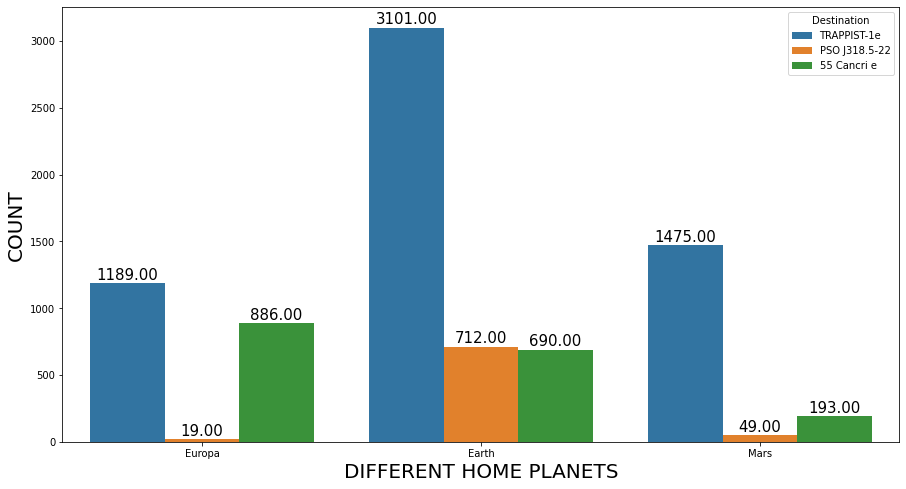

In [9]:
# Plotting count plot between two features with annotaion
plt.figure(figsize=(15,8))
plots = sns.countplot(x="HomePlanet", hue="Destination", data=data)
plt.xlabel("DIFFERENT HOME PLANETS",fontsize= 20)
plt.ylabel("COUNT", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

### Majority of the people are travelling from Planet "Earth" to Planet "TRAPPIST-1e". Hence,we will replace missing values in "HomePlanet" & "Destination" with "Earth" and "TRAPPIST-1e" respectively.  

In [10]:
data["HomePlanet"].fillna("Earth",inplace=True)

In [11]:
data["Destination"].fillna("TRAPPIST-1e",inplace=True)

In [12]:
data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
data["CryoSleep"].fillna(data["CryoSleep"].mode()[0], inplace=True)

In [14]:
data["Age"].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [15]:
data["Age"].fillna(data["Age"].mode()[0], inplace=True)

In [16]:
data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [17]:
data["VIP"].fillna(data["VIP"].mode()[0], inplace=True)

### Separating Deck,Cabin,and Port side values and storing them in new columns

In [18]:
cabin_data = data["Cabin"].str.split("/", n=2, expand=True)

In [19]:
cabin_data

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [20]:
data["Deck"]=cabin_data[0]
data["Number"]=cabin_data[1]
data["Side"]=cabin_data[2]

In [21]:
data.drop("Cabin", axis=1,inplace=True)   # Dropping columns "cabin"

In [22]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [23]:
# Filling the missing values with mode
data["Deck"].fillna(data["Deck"].mode()[0], inplace=True)
data["Side"].fillna(data["Side"].mode()[0], inplace=True)
data["Number"].fillna(data["Number"].mode()[0], inplace=True)

In [24]:
data["RoomService"].fillna(data["RoomService"].median(), inplace=True)
data["FoodCourt"].fillna(data["FoodCourt"].median(), inplace=True)
data["ShoppingMall"].fillna(data["ShoppingMall"].median(), inplace=True)
data["Spa"].fillna(data["Spa"].median(), inplace=True)
data["VRDeck"].fillna(data["VRDeck"].median(), inplace=True)

In [25]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Number          0
Side            0
dtype: int64

## Label-encoding

In [26]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [27]:
# dividing Age values into groups
lst=[data]
for column in lst:
    column.loc[(column['Age']>=0) & (column['Age']<=1), "Age_category"]="Infant"
    column.loc[(column['Age']>=2) & (column['Age']<=4), "Age_category"]="Toddler"
    column.loc[(column['Age']>=5) & (column['Age']<=12), "Age_category"]="Child"
    column.loc[(column['Age']>=13) & (column['Age']<=19), "Age_category"]="Teen"
    column.loc[(column['Age']>=20) & (column['Age']<=39), "Age_category"]="Adult"
    column.loc[(column['Age']>=40) & (column['Age']<=59), "Age_category"]="Middle Age Adult"
    column.loc[(column['Age']>=60) ,"Age_category"]="Senior Adult"

data['Age_category'] = data['Age_category'].astype("category")


In [28]:
data.drop("Age", axis=1, inplace=True)

In [29]:
new_data = data.copy()

In [30]:
lst_of_col=['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Transported', 'Deck', 'Side', 'Age_category']
for i in lst_of_col:
    new_data[i]=new_data[i].astype("category")
    new_data[i]=new_data[i].cat.codes 

In [31]:
label_encoded_data = new_data.copy()

In [32]:
new_data["Number"].value_counts()

82      227
19       22
86       22
56       21
176      21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Number, Length: 1817, dtype: int64

In [33]:
# one hot encoding
lst_of_col_two=['HomePlanet','Destination','Deck','Age_category']
for i in lst_of_col_two:
    new_data=pd.get_dummies(new_data, columns=[i],drop_first=True)

In [34]:
new_data.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Number,Side,...,Deck_4,Deck_5,Deck_6,Deck_7,Age_category_1,Age_category_2,Age_category_3,Age_category_4,Age_category_5,Age_category_6
0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [35]:
# Seprating dependent and independent variables
X = new_data.drop("Transported", axis=1)
y= new_data["Transported"]

In [36]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.73277002, -0.15306307, -0.33310466, ..., -0.17348877,
        -0.4291516 , -0.16151139],
       [-0.73277002, -0.15306307, -0.16807343, ..., -0.17348877,
        -0.4291516 , -0.16151139],
       [-0.73277002,  6.53325471, -0.2680006 , ..., -0.17348877,
        -0.4291516 , -0.16151139],
       ...,
       [-0.73277002, -0.15306307, -0.33310466, ..., -0.17348877,
        -0.4291516 , -0.16151139],
       [-0.73277002, -0.15306307, -0.33310466, ..., -0.17348877,
        -0.4291516 , -0.16151139],
       [-0.73277002, -0.15306307, -0.14233462, ..., -0.17348877,
        -0.4291516 , -0.16151139]])

In [37]:
X_scaled = pd.DataFrame(X_scaled)

In [38]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.732770,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.149753,-1.032865,1.754795,...,-0.334759,-0.724629,-0.645897,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,-0.429152,-0.161511
1,-0.732770,-0.153063,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.149753,0.968181,-0.569867,...,-0.334759,1.380016,-0.645897,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,-0.429152,-0.161511
2,-0.732770,6.533255,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.149753,0.968181,1.754795,...,-0.334759,-0.724629,-0.645897,-0.02399,-0.201752,-0.170297,2.101476,-0.173489,-0.429152,-0.161511
3,-0.732770,-0.153063,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.149753,0.968181,1.754795,...,-0.334759,-0.724629,-0.645897,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,-0.429152,-0.161511
4,-0.732770,-0.153063,0.125652,-0.237159,-0.031059,0.231374,-0.261240,-1.147800,0.968181,-0.569867,...,-0.334759,1.380016,-0.645897,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,2.330179,-0.161511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.732770,6.533255,-0.333105,3.992336,-0.283579,1.189173,-0.197751,-0.958291,-1.032865,1.754795,...,-0.334759,-0.724629,-0.645897,-0.02399,-0.201752,-0.170297,2.101476,-0.173489,-0.429152,-0.161511
8689,1.364685,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.778839,0.968181,-0.569867,...,-0.334759,-0.724629,1.548235,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,2.330179,-0.161511
8690,-0.732770,-0.153063,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1.780793,0.968181,-0.569867,...,-0.334759,-0.724629,1.548235,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,-0.429152,-0.161511
8691,-0.732770,-0.153063,-0.333105,0.376365,-0.283579,0.043013,2.589576,0.038095,0.968181,1.754795,...,2.987225,-0.724629,-0.645897,-0.02399,-0.201752,-0.170297,-0.475856,-0.173489,-0.429152,-0.161511


In [39]:
# checking for imbalanced 
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

### Target variable is well balance. 

# EDA

In [40]:
data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side,Age_category
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Adult
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Adult
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Middle Age Adult
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Adult
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Teen


<AxesSubplot:>

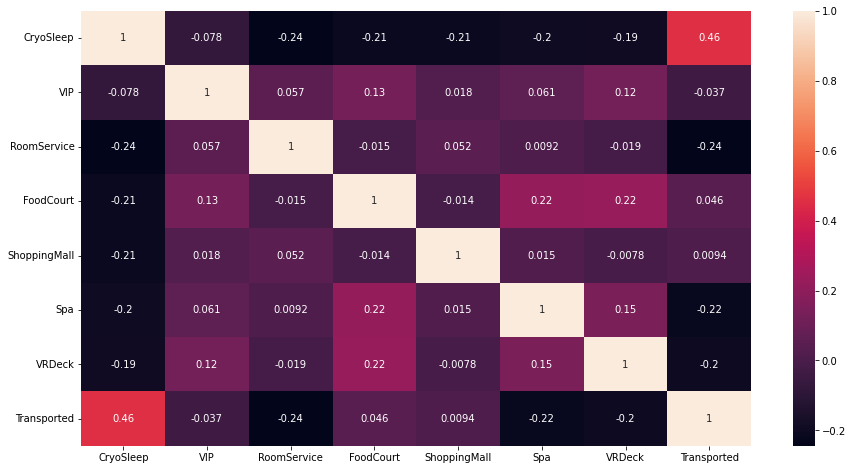

In [41]:
# Plotting correlational matrix
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr,annot=True)

### Observations:-
* Highest positive correlation can be seen between columns "CryoSleep"and"Transported".
* Highest negative correlation can be seen between columns "RoomService"and"Transported".

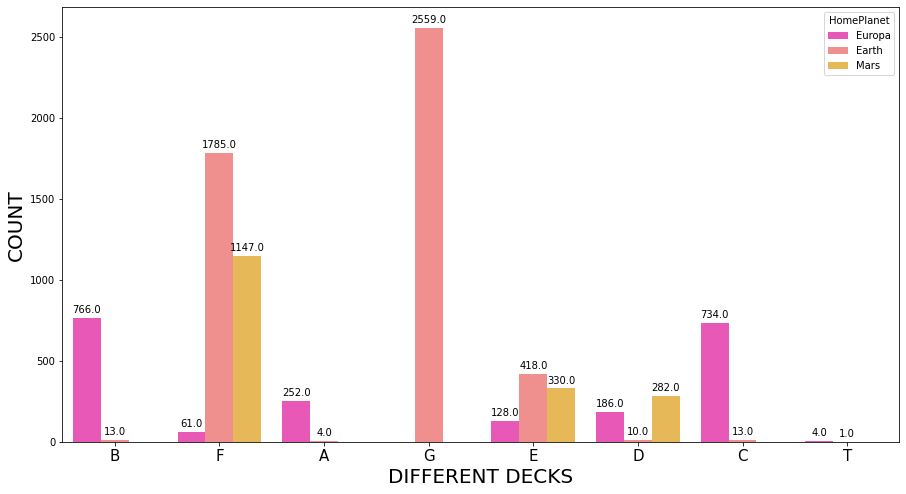

In [42]:
# Plotting count plot between "Deck" and "HomePlanet"
plt.figure(figsize=(15,8))
plots = sns.countplot(x="Deck", hue="HomePlanet", data=data, palette='spring')
plt.xticks(fontsize=15)
plt.xlabel("DIFFERENT DECKS",fontsize= 20)
plt.ylabel("COUNT", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=10, xytext=(0, 8),textcoords='offset points')   

### Highest no. of people are staying on deck 'G'. 
### Only 5 people are staying on Deck 'T'.

In [43]:
# to get ouput after filtering values in two columns / conditon based filtering
filter1 = data["Deck"].isin(["T"])
#filter2 = credit_data["Dependents"]=='0'
df1=data[filter1]
#df1.Dependents.value_counts()

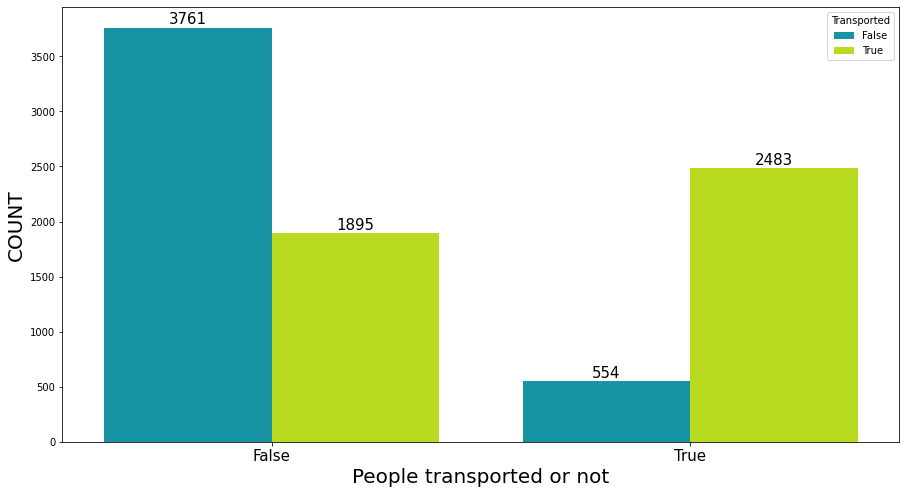

In [44]:
# Plotting count plot between "CryoSleep" and "Transported"
plt.figure(figsize=(15,8))
plots = sns.countplot(x="CryoSleep", hue="Transported", data=data, palette="nipy_spectral")
plt.xticks(fontsize=15)
plt.xlabel("People transported or not",fontsize= 20)
plt.ylabel("COUNT", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

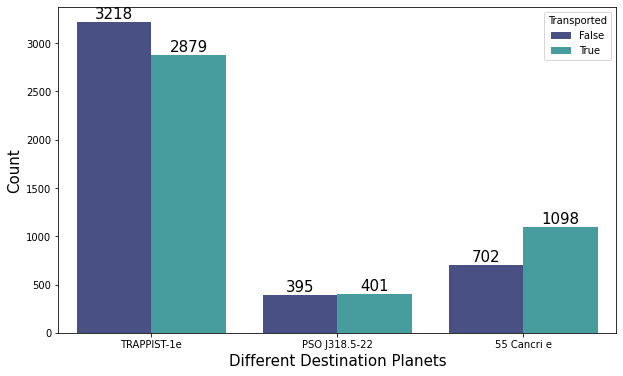

In [45]:
# Plotting count plot between "Destination" and "Transported"
plt.figure(figsize=(10,6))
plots = sns.countplot( x = "Destination", hue="Transported",data=data, palette="mako")
plt.xticks(fontsize=10)
plt.xlabel("Different Destination Planets",fontsize=15)
plt.ylabel("Count",fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

### Max. people are travelling to planet "TRAPPIST-1e"

# test-train-split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=111)

# Using XgBoost Algorithm

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Predicting using the model

In [48]:
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

# Evaluation metrics

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print(classification_report(y_train, y_pred_xgb_train))
print("="*60)
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3221
           1       0.92      0.91      0.92      3298

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1094
           1       0.81      0.79      0.80      1080

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [51]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print("="*20)
print(confusion_matrix(y_test, y_pred_xgb_test))

[[2954  267]
 [ 282 3016]]
[[894 200]
 [232 848]]


In [52]:
print(accuracy_score(y_train, y_pred_xgb_train))
print("="*20)
print(accuracy_score(y_test, y_pred_xgb_test))

0.9157846295444086
0.8012879484820608


## We are getting an accuracy of 80.12% using Xgboost algorithm

In [53]:
# Loading the test data
test_data= pd.read_csv("C:\\python_class\\KAGGLE_DATASETS\\SPCAESHIP_TITANIC_DATA\\test.csv")

In [54]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [55]:
test_data.shape

(4277, 13)

# Data-preprocessing of the test data

In [59]:
indexcol = test_data.PassengerId.to_numpy()
test_data.set_index('PassengerId',inplace=True)

In [60]:
test_data.drop(["Name"], axis=1, inplace=True)

In [62]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


## Handling the missing data

In [63]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [64]:
test_data["HomePlanet"].fillna("Earth",inplace=True)
test_data["Destination"].fillna("TRAPPIST-1e",inplace=True)
test_data["CryoSleep"].fillna(test_data["CryoSleep"].mode()[0], inplace=True)
test_data["VIP"].fillna(test_data["VIP"].mode()[0], inplace=True)

In [65]:
test_data["RoomService"].fillna(test_data["RoomService"].median(), inplace=True)
test_data["FoodCourt"].fillna(test_data["FoodCourt"].median(), inplace=True)
test_data["ShoppingMall"].fillna(test_data["ShoppingMall"].median(), inplace=True)
test_data["Spa"].fillna(test_data["Spa"].median(), inplace=True)
test_data["VRDeck"].fillna(test_data["VRDeck"].median(), inplace=True)

In [66]:
test_data["Age"].fillna(test_data["Age"].mode()[0], inplace=True)

### Separating Deck,Cabin,and Port side values and storing them in new columns

In [67]:
test_cabin_data = test_data["Cabin"].str.split("/", n=2, expand=True)

In [68]:
test_cabin_data.head()

,0,1,2
PassengerId,,,
0013_01,G,3,S
0018_01,F,4,S
0019_01,C,0,S
0021_01,C,1,S
0023_01,F,5,S


In [69]:
test_data["Deck"]=test_cabin_data[0]
test_data["Number"]=test_cabin_data[1]
test_data["Side"]=test_cabin_data[2]

In [70]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Number,Side
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [71]:
test_data.drop("Cabin", axis=1,inplace=True)   # Dropping columns "cabin"

In [72]:
# Filling the missing values with mode
test_data["Deck"].fillna(test_data["Deck"].mode()[0], inplace=True)
test_data["Side"].fillna(test_data["Side"].mode()[0], inplace=True)
test_data["Number"].fillna(test_data["Number"].mode()[0], inplace=True)

In [73]:
test_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Number          0
Side            0
dtype: int64

## Label-encoding

In [74]:
# dividing Age values into groups
test_data_lst=[test_data]
for column in test_data_lst:
    column.loc[(column['Age']>=0) & (column['Age']<=1), "Age_category"]="Infant"
    column.loc[(column['Age']>=2) & (column['Age']<=4), "Age_category"]="Toddler"
    column.loc[(column['Age']>=5) & (column['Age']<=12), "Age_category"]="Child"
    column.loc[(column['Age']>=13) & (column['Age']<=19), "Age_category"]="Teen"
    column.loc[(column['Age']>=20) & (column['Age']<=39), "Age_category"]="Adult"
    column.loc[(column['Age']>=40) & (column['Age']<=59), "Age_category"]="Middle Age Adult"
    column.loc[(column['Age']>=60) ,"Age_category"]="Senior Adult"

test_data['Age_category'] = test_data['Age_category'].astype("category")

In [75]:
test_data.drop("Age", axis=1, inplace=True)

In [76]:
new_test_data= test_data.copy()

In [77]:
new_test_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Number,Side,Age_category
PassengerId,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,G,3,S,Adult
0018_01,Earth,False,TRAPPIST-1e,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,Teen
0019_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,C,0,S,Adult
0021_01,Europa,False,TRAPPIST-1e,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,Adult
0023_01,Earth,False,TRAPPIST-1e,False,10.0,0.0,635.0,0.0,0.0,F,5,S,Adult


In [78]:
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    4277 non-null   object  
 1   CryoSleep     4277 non-null   bool    
 2   Destination   4277 non-null   object  
 3   VIP           4277 non-null   bool    
 4   RoomService   4277 non-null   float64 
 5   FoodCourt     4277 non-null   float64 
 6   ShoppingMall  4277 non-null   float64 
 7   Spa           4277 non-null   float64 
 8   VRDeck        4277 non-null   float64 
 9   Deck          4277 non-null   object  
 10  Number        4277 non-null   object  
 11  Side          4277 non-null   object  
 12  Age_category  4277 non-null   category
dtypes: bool(2), category(1), float64(5), object(5)
memory usage: 380.4+ KB


In [79]:
lst_of_test_col=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Deck', 'Side', 'Age_category']
for i in lst_of_test_col:
    new_test_data[i]=new_test_data[i].astype("category")
    new_test_data[i]=new_test_data[i].cat.codes 

In [80]:
# one hot encoding
lst_of_test_col_two=['HomePlanet','Destination','Deck','Age_category']
for i in lst_of_test_col_two:
    new_test_data=pd.get_dummies(new_test_data, columns=[i],drop_first=True)

In [81]:
new_test_data.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Number,Side,HomePlanet_1,...,Deck_4,Deck_5,Deck_6,Deck_7,Age_category_1,Age_category_2,Age_category_3,Age_category_4,Age_category_5,Age_category_6
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,0,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,1,0,0,0,0,0,0,0
0018_01,0,0,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,1,0,0,0,0,0,0,1,0
0019_01,1,0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
0021_01,0,0,0.0,6652.0,0.0,181.0,585.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0023_01,0,0,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_test_scaled = sc.fit_transform(new_test_data)
new_test_scaled

array([[ 1.33044268, -0.13268938, -0.35733908, ..., -0.17279448,
        -0.47856346, -0.14577789],
       [-0.75162953, -0.13268938, -0.35733908, ..., -0.17279448,
         2.08958702, -0.14577789],
       [ 1.33044268, -0.13268938, -0.35733908, ..., -0.17279448,
        -0.47856346, -0.14577789],
       ...,
       [ 1.33044268, -0.13268938, -0.35733908, ..., -0.17279448,
         2.08958702, -0.14577789],
       [-0.75162953, -0.13268938, -0.35733908, ..., -0.17279448,
         2.08958702, -0.14577789],
       [ 1.33044268, -0.13268938, -0.35733908, ..., -0.17279448,
        -0.47856346, -0.14577789]])

In [83]:
new_test_scaled = pd.DataFrame(new_test_scaled)

In [84]:
new_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.330443,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,-1.146946,0.974831,-0.553131,...,-0.341629,-0.752010,1.581139,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,-0.478563,-0.145778
1,-0.751630,-0.132689,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,-1.145012,0.974831,-0.553131,...,-0.341629,1.329769,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,2.089587,-0.145778
2,1.330443,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,-1.152749,0.974831,1.807889,...,-0.341629,-0.752010,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,-0.478563,-0.145778
3,-0.751630,-0.132689,-0.357339,4.121518,-0.312173,-0.104002,0.226648,-1.150814,0.974831,1.807889,...,-0.341629,-0.752010,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,-0.478563,-0.145778
4,-0.751630,-0.132689,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,-1.143078,0.974831,-0.553131,...,-0.341629,1.329769,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,-0.478563,-0.145778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.330443,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,1.740699,0.974831,-0.553131,...,-0.341629,-0.752010,1.581139,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,-0.478563,-0.145778
4273,-0.751630,-0.132689,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,-1.145012,0.974831,-0.553131,...,-0.341629,1.329769,-0.632456,-0.037481,-0.192613,-0.161715,2.127402,-0.172794,-0.478563,-0.145778
4274,1.330443,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,-0.580248,-1.025818,-0.553131,...,-0.341629,-0.752010,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,2.089587,-0.145778
4275,-0.751630,-0.132689,-0.357339,1.491019,-0.312173,-0.267841,0.176479,-0.578314,-1.025818,1.807889,...,-0.341629,-0.752010,-0.632456,-0.037481,-0.192613,-0.161715,-0.470057,-0.172794,2.089587,-0.145778


In [85]:
# predicting the values using the model
y_pred_new_test_xgb = xgb.predict(new_test_scaled)

In [86]:
y_pred_new_test_xgb

array([0, 0, 1, ..., 1, 1, 0])

In [92]:
Predicted_data = pd.DataFrame(columns=["PassengerId","Transported"])
Predicted_data["PassengerId"] = indexcol
Predicted_data.set_index('PassengerId')
Predicted_data["Transported"] = xgb.predict(new_test_scaled).astype(bool)
Predicted_data

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [94]:
Predicted_data.to_csv('submission.csv', index=False)